# Import required libaries

In [343]:
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt

# Import dataset

In [344]:
path = "../data/raw/Amazon Sale Report.csv"
df = pd.read_csv(path)

df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13876\1866423429.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [346]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# Data cleaning

<Axes: >

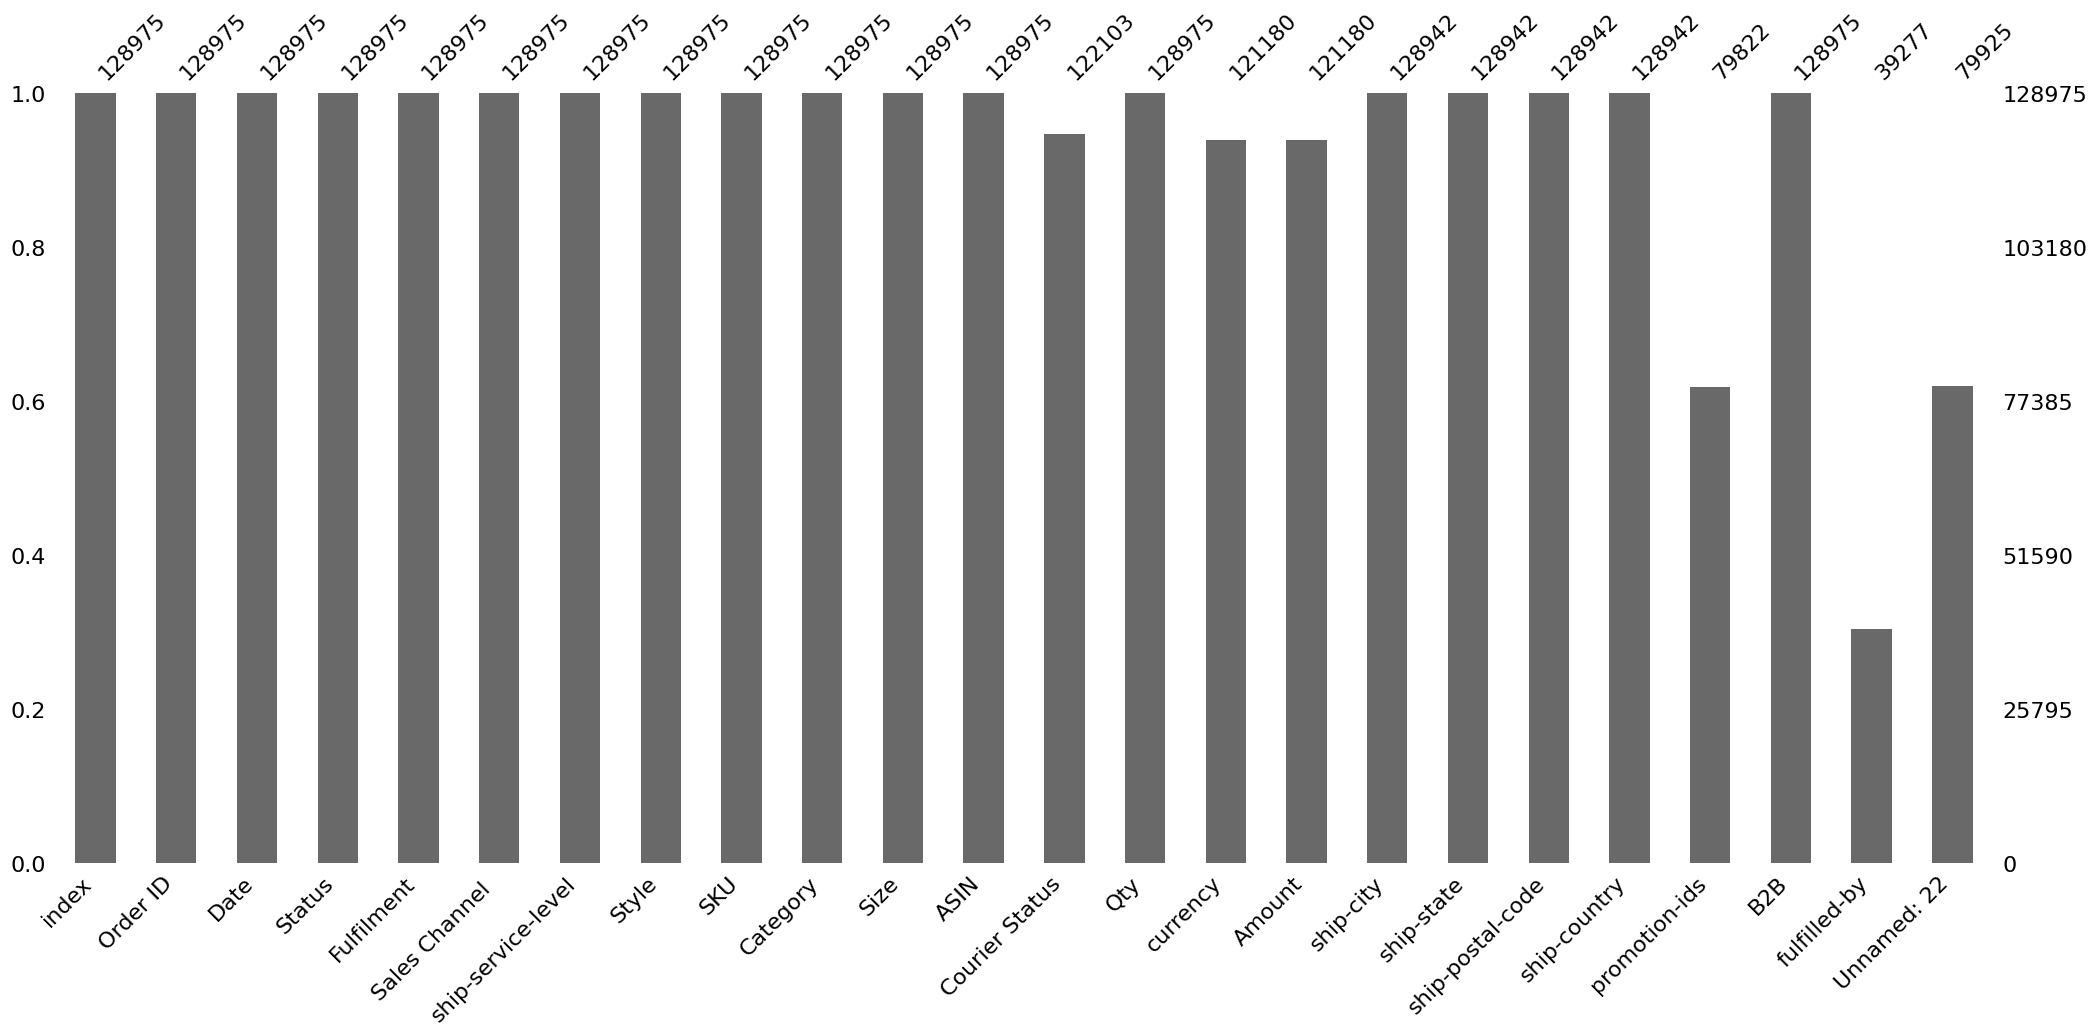

In [347]:
%matplotlib inline
msno.bar(df)

In [348]:
# msno.heatmap(df)

In [349]:
# msno.matrix(df)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13876\537388779.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<Axes: >

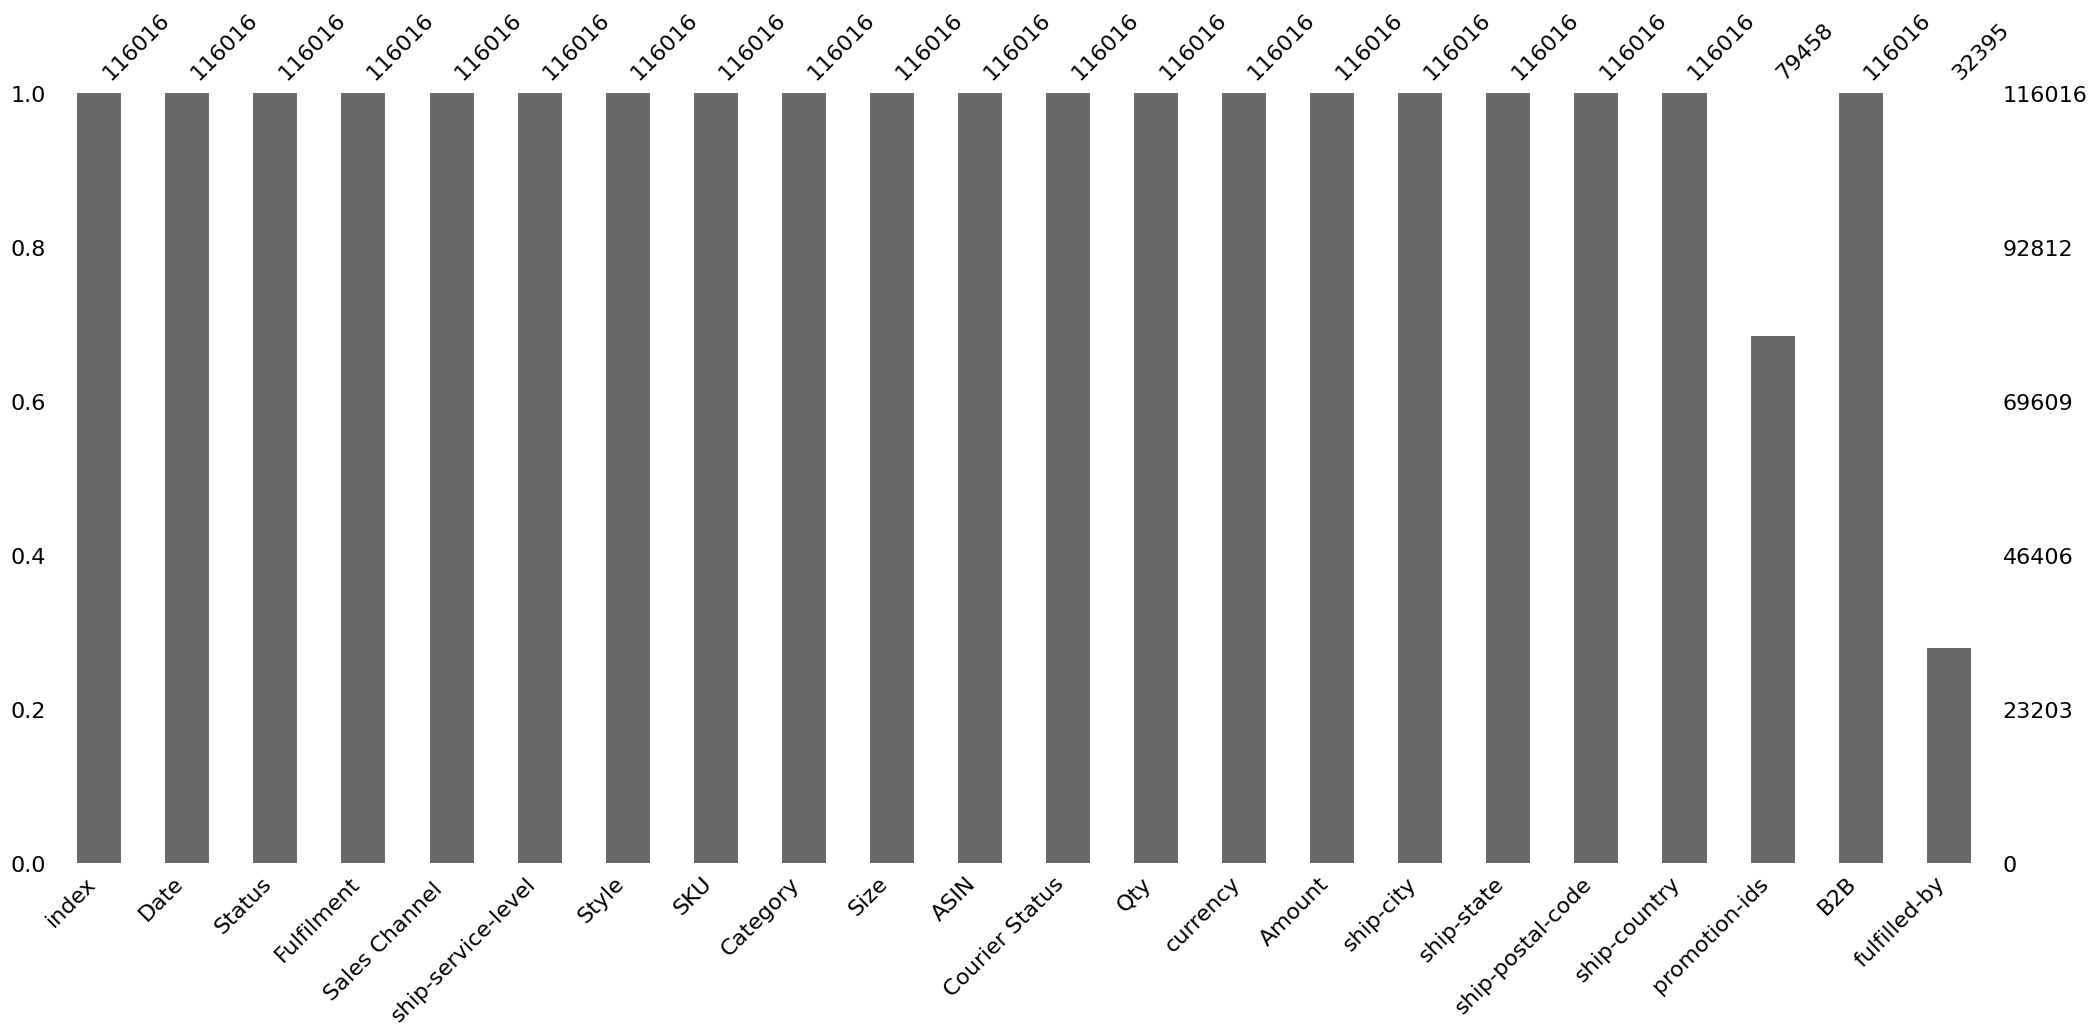

In [350]:
df.drop(columns=['Order ID', 'Unnamed: 22'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
# df['Date'] = df['Date'].apply(lambda x: x.toordinal())
df.drop_duplicates(inplace=True)
df.dropna(subset=['Courier Status', 'currency', 'Amount', 'ship-postal-code'], inplace=True)
msno.bar(df)

<Axes: >

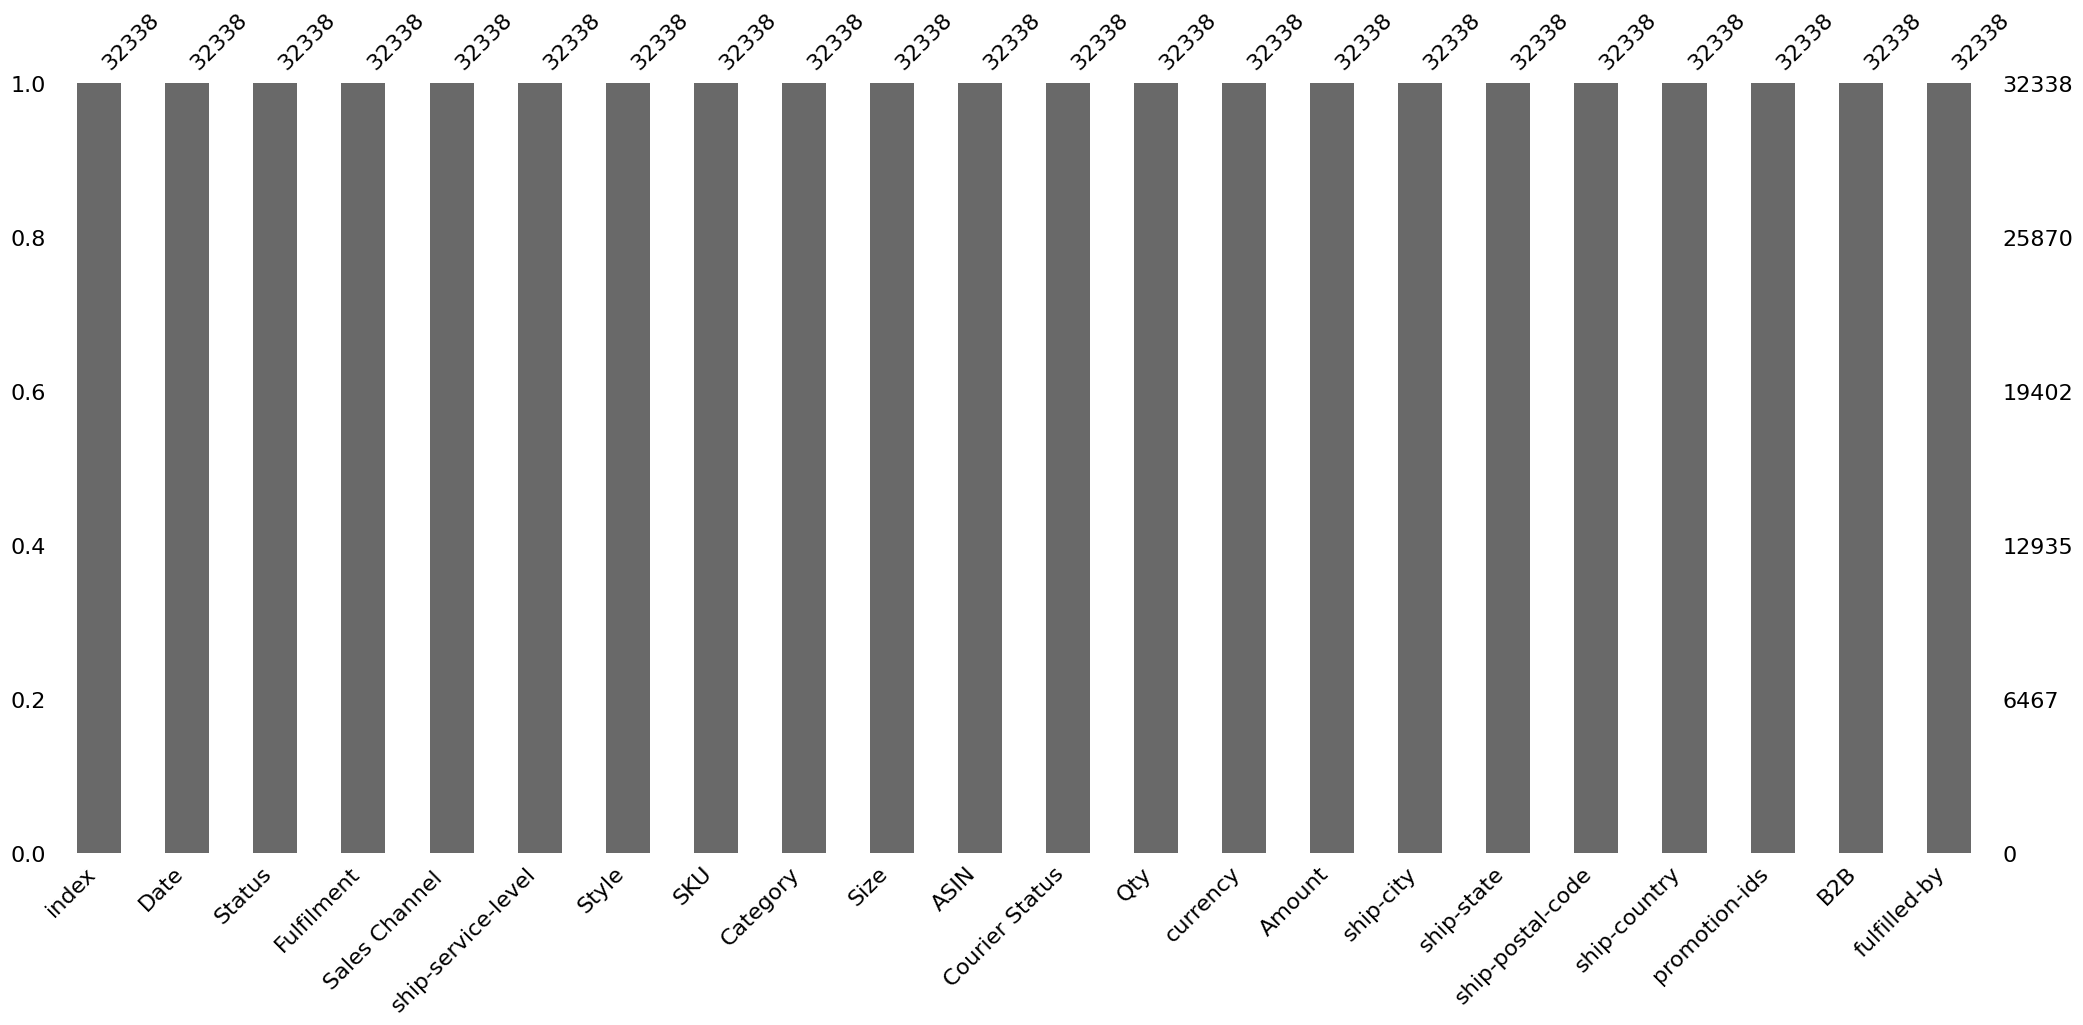

In [351]:
from sklearn.preprocessing import LabelEncoder

le = dict()
i = 0
for col in ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 
            'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'currency', 
            'ship-city', 'ship-state', 'ship-country', 'B2B']:
    le[i] = LabelEncoder()
    df[col] = le[i].fit_transform(df[col])
    i += 1

df2 = df.drop(columns=['promotion-ids','fulfilled-by'])
df.dropna(subset=['promotion-ids', 'fulfilled-by'], inplace=True)

for col in ['promotion-ids', 'fulfilled-by']:
    le[i] = LabelEncoder()
    df[col] = le[i].fit_transform(df[col])
    i += 1

df.head()
msno.bar(df)

In [352]:
df2.head()

,index,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1,1,2022-04-30,5,1,0,1,845,4389,8,0,5229,0,1,0,406.0,734,22,560085.0,0,0
2,2,2022-04-30,3,0,0,0,531,2596,8,8,666,0,1,0,329.0,5076,27,410210.0,0,1
4,4,2022-04-30,3,0,0,0,752,3791,6,0,4308,0,1,0,574.0,1385,54,600073.0,0,0
5,5,2022-04-30,3,0,0,0,1230,6215,5,8,2904,0,1,0,824.0,2368,57,201102.0,0,0
6,6,2022-04-30,3,0,0,0,180,652,5,5,1656,0,1,0,653.0,1334,9,160036.0,0,0


<Axes: >

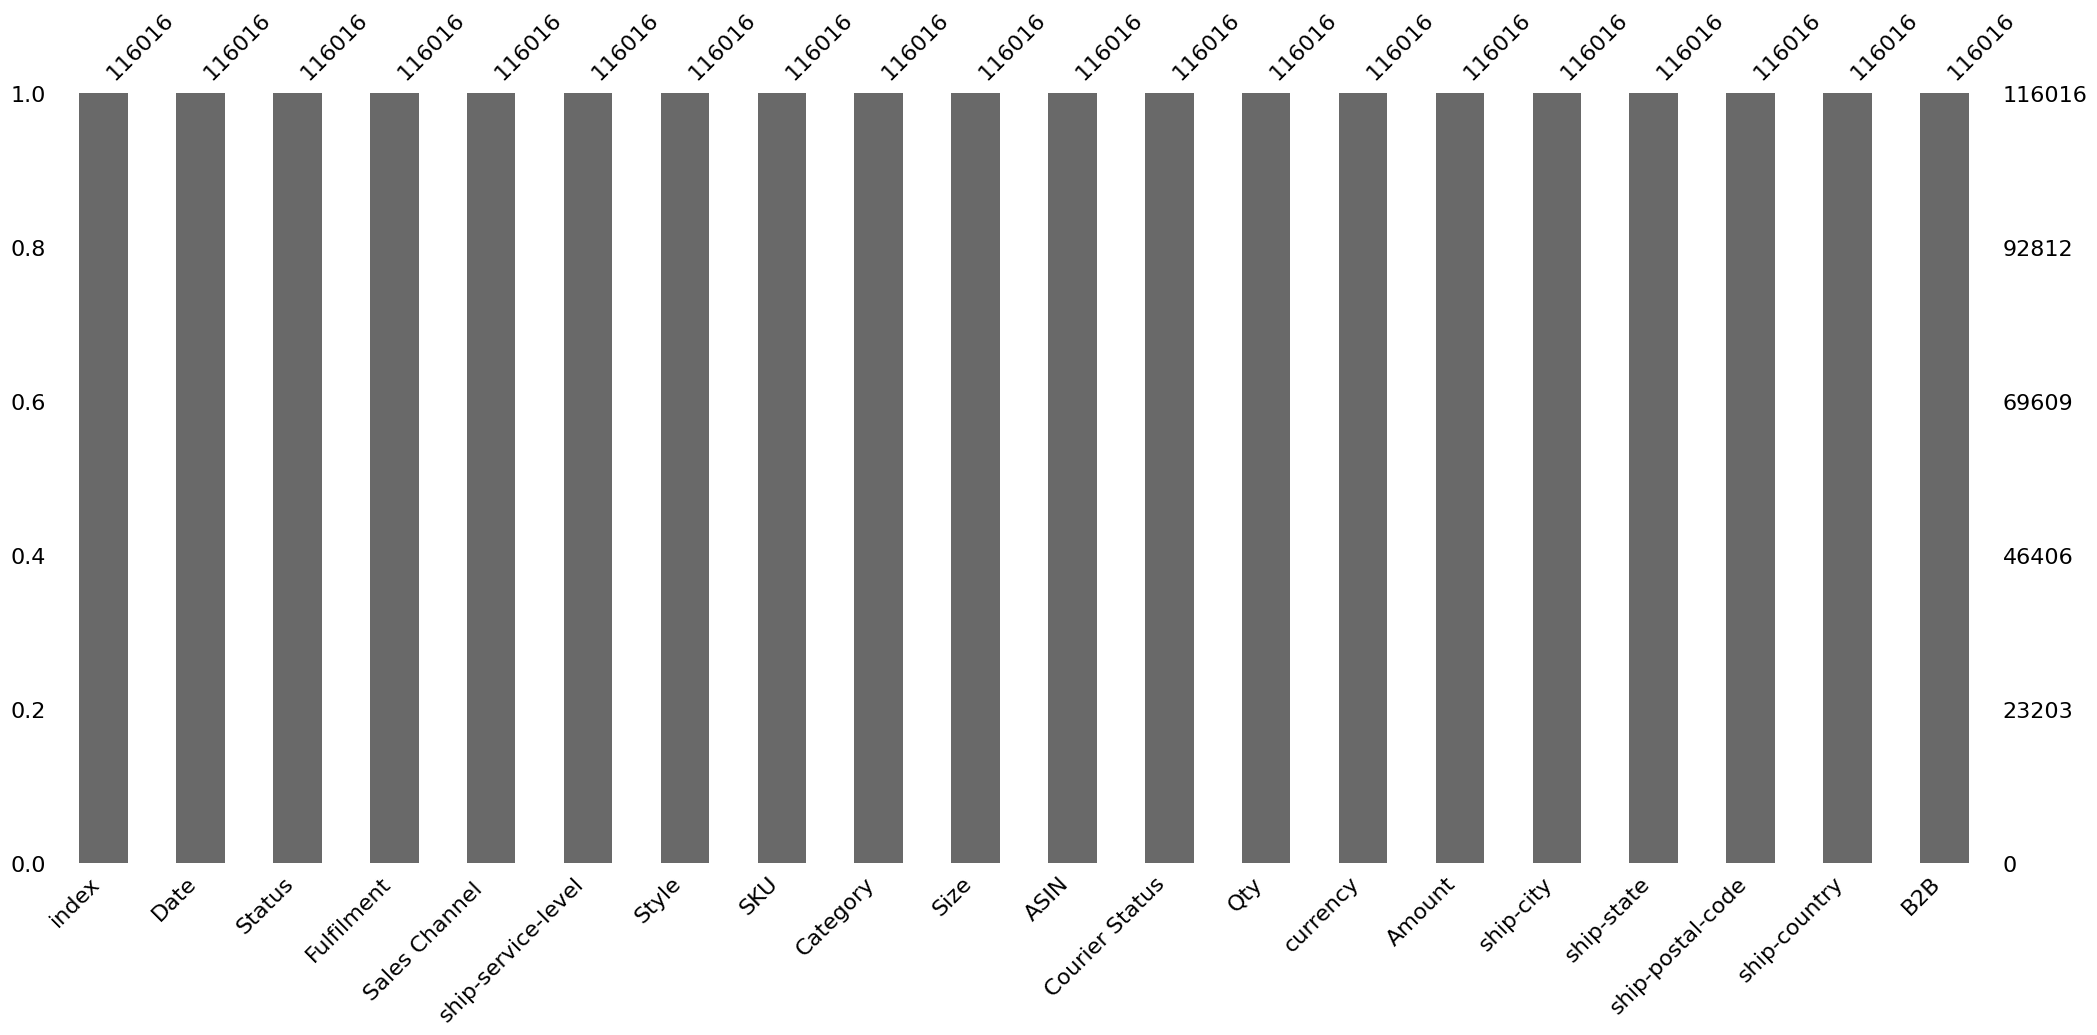

In [353]:
msno.bar(df2)

# Data Visualization

                Amount
Date                  
2022-03-31     98261.0
2022-04-30  27575532.0
2022-05-31  25112855.0
2022-06-30  22598327.0


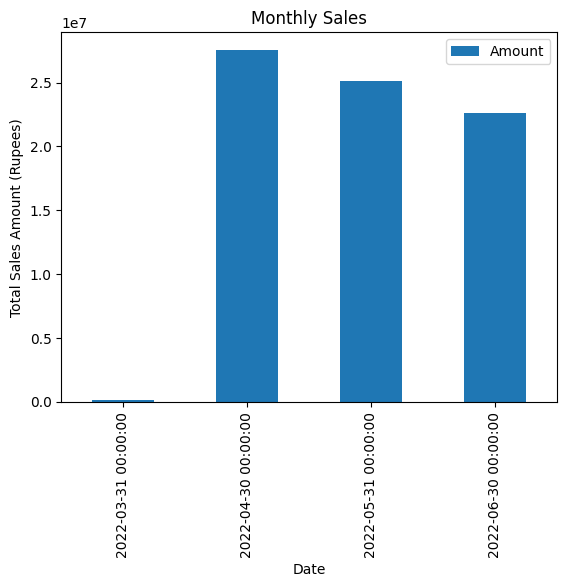

In [354]:
# df_test = df[df.Qty != 0] # seems to be accounted for in csv
df_test= df2[['Date', 'Amount']]

monthly_sales = df_test.resample('ME', on='Date').sum()
print(monthly_sales)
monthly_sales.plot(kind='bar', y='Amount', legend=True)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (Rupees)')

plt.savefig('../reports/figures/monthly_sales.png', bbox_inches='tight')
plt.show()

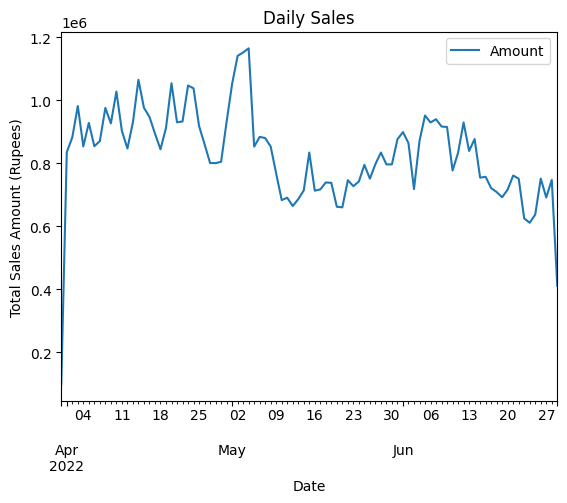

In [355]:
# df_test = df_test[df.Qty != 0] # seems to be accounted for in csv
df_test = df2[['Date', 'Amount']]

daily_sales = df_test.resample('D', on='Date').sum()
daily_sales
daily_sales.plot(kind='line', y='Amount', legend=True)
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (Rupees)')

plt.savefig('../reports/figures/daily_sales.png', bbox_inches='tight')
plt.show()

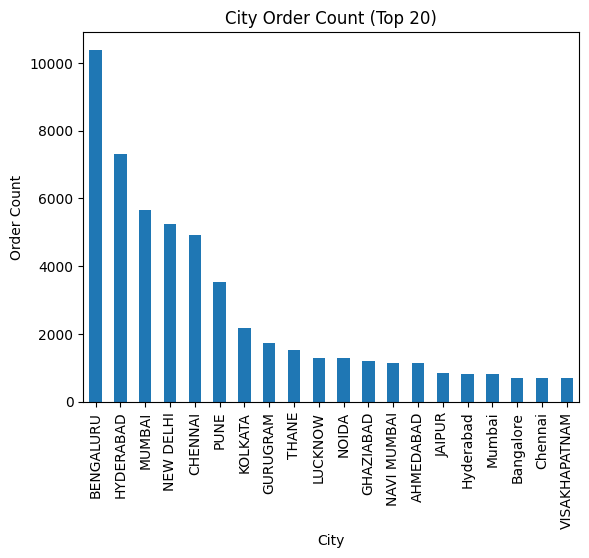

In [356]:
city_count = df2.copy()
city_count['ship-city'] = le[11].inverse_transform(city_count['ship-city']) # map le later

city_count['ship-city'].value_counts().head(20).plot(kind='bar')
plt.title('City Order Count (Top 20)')
plt.xlabel('City')
plt.ylabel('Order Count')

plt.savefig('../reports/figures/city_orders.png', bbox_inches='tight')
plt.show()

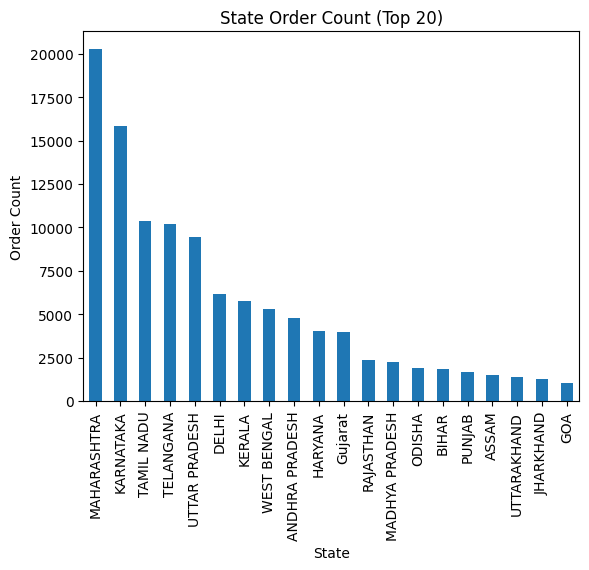

In [357]:
state_count = df2.copy()
state_count['ship-state'] = le[12].inverse_transform(state_count['ship-state']) # map le later

state_count['ship-state'].value_counts().head(20).plot(kind='bar')
plt.title('State Order Count (Top 20)')
plt.xlabel('State')
plt.ylabel('Order Count')

plt.savefig('../reports/figures/state_orders.png', bbox_inches='tight')
plt.show()

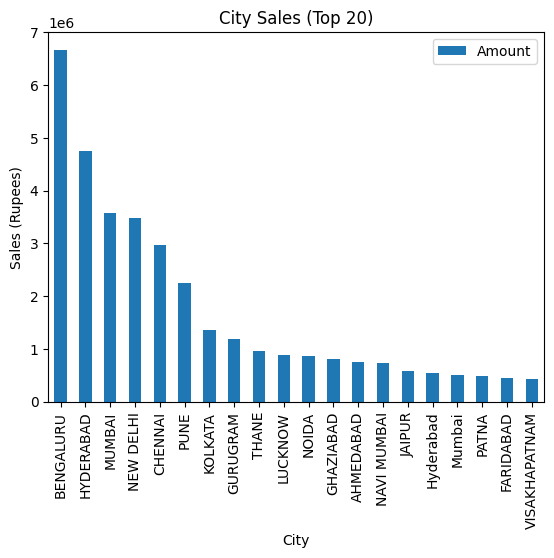

In [358]:
city_df = df2[['ship-city', 'Amount']].copy()
city_df['ship-city'] = le[11].inverse_transform(city_df['ship-city']) # map le later

city_sales = city_df.groupby(['ship-city']).sum().reset_index()
city_sales = city_sales.sort_values('Amount', ascending=False).head(20)
city_sales.plot(kind='bar', x='ship-city')

plt.title('City Sales (Top 20)')
plt.xlabel('City')
plt.ylabel('Sales (Rupees)')

plt.savefig('../reports/figures/city_sales.png', bbox_inches='tight')
plt.show()

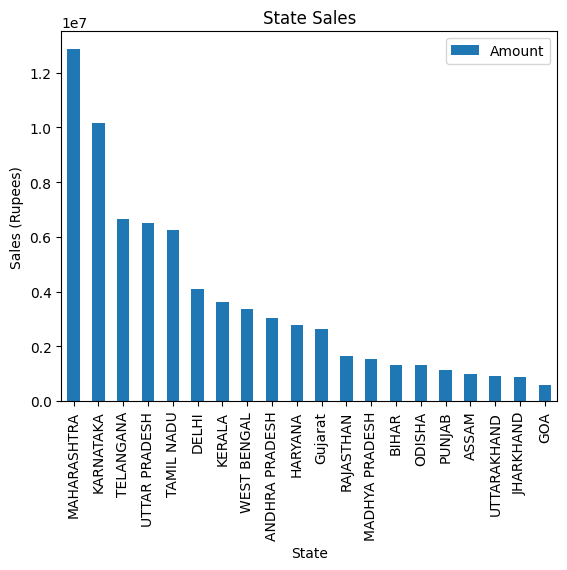

In [359]:
state_df = df2[['ship-state', 'Amount']].copy()
state_df['ship-state'] = le[12].inverse_transform(state_df['ship-state']) # map le later

state_sales = state_df.groupby(['ship-state']).sum().reset_index()
state_sales = state_sales.sort_values('Amount', ascending=False).head(20)
state_sales.plot(kind='bar', x='ship-state')

plt.title('State Sales')
plt.xlabel('State')
plt.ylabel('Sales (Rupees)')

plt.savefig('../reports/figures/state_sales.png', bbox_inches='tight')
plt.show()

# Regression Analysis

Text(0, 0.5, 'Total Sales Amount (Rupees)')

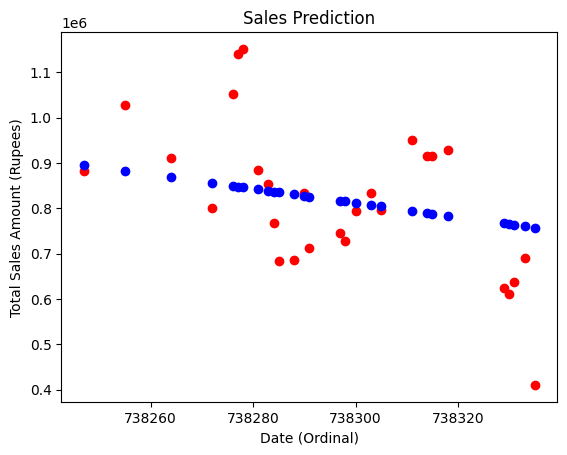

In [368]:
daily_sales['Ordinal'] = daily_sales.index
daily_sales['Ordinal'] = daily_sales['Ordinal'].apply(lambda x: x.toordinal())
X = daily_sales['Ordinal'].values
y = daily_sales['Amount'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)

plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, lin_reg.predict(X_test.reshape(-1, 1)), color= 'blue')
plt.title('Sales Prediction')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Total Sales Amount (Rupees)')


In [369]:
y_pred = lin_reg.predict(X_test.reshape(-1,1))

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def print_metrics(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    print('R2 Score: ' + str(r2))

    mqe = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error: ' + str(mqe))

    rmse = root_mean_squared_error(y_test, y_pred)
    print('Root Mean Squared Error: ' + str(rmse))
    nrmse = rmse/(y_test.max() - y_test.min())
    print('Normalized Root Mean Squared Error: ' + str(nrmse))

    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("Mean Absolute Percentage Error: " + str(mape))

print_metrics(y_test, y_pred)

R2 Score: 0.2084631501513574
Mean Squared Error: 20971842004.197147
Root Mean Squared Error: 144816.58055691395
Normalized Root Mean Squared Error: 0.19530983754848666
Mean Absolute Percentage Error: 0.15152595905466842


R2 Score: 0.5104796312822755
Mean Squared Error: 10293805140.41215
Root Mean Squared Error: 101458.39117792156
Normalized Root Mean Squared Error: 0.13683393035994876
Mean Absolute Percentage Error: 0.09622195230710413


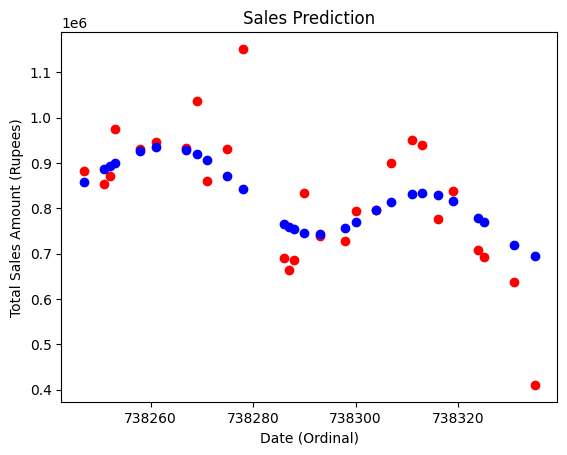

In [387]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

X2 = sc_X.fit_transform(X)
y2 = sc_y.fit_transform(y)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state = 0)

from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X2_train, y2_train.ravel())

y2_pred = svm_reg.predict(X2_test)
y2_test_inv = sc_y.inverse_transform(y2_test)
y2_pred_inv = sc_y.inverse_transform(y2_pred.reshape(-1, 1))

plt.scatter(sc_X.inverse_transform(X2_test), y2_test_inv, color = 'red')
plt.scatter(sc_X.inverse_transform(X2_test), y2_pred_inv, color= 'blue')
plt.title('Sales Prediction')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Total Sales Amount (Rupees)')

print_metrics(y2_test_inv, y2_pred_inv)

R2 Score: 0.5888460172472642
Mean Squared Error: 10893562778.960445
Root Mean Squared Error: 104372.23183855199
Normalized Root Mean Squared Error: 0.14076374104793307
Mean Absolute Percentage Error: 0.1063042280932089
None


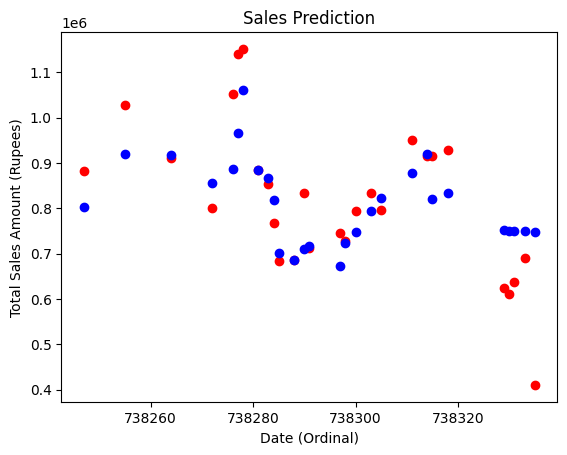

In [385]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train.reshape(-1, 1), y_train)

y_pred = rf_reg.predict(X_test.reshape(-1, 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color= 'blue')
plt.title('Sales Prediction')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Total Sales Amount (Rupees)')

print(print_metrics(y_test, y_pred))

R2 Score: 0.5958295762643342
Mean Squared Error: 10708532737.262468
Root Mean Squared Error: 103482.04065084177
Normalized Root Mean Squared Error: 0.1395631665309119
Mean Absolute Percentage Error: 0.10654928698546
None


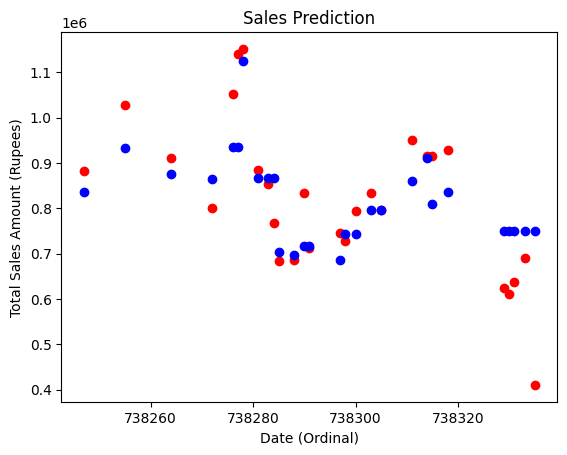

In [386]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_reg.fit(X_train.reshape(-1, 1), y_train)

y_pred = gb_reg.predict(X_test.reshape(-1, 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color= 'blue')
plt.title('Sales Prediction')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Total Sales Amount (Rupees)')

print(print_metrics(y_test, y_pred))